# Linear Regression Analysis: CCPP Energy Output Prediction

**Course:** MSc in Software Design with AI
**Assignment:** Continuous Assessment Project
**Date:** November 2025

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
import os
warnings.filterwarnings('ignore')

print('Libraries imported successfully')

Libraries imported successfully


## 1.1 Objectives

### Business Problem
Combined Cycle Power Plant needs to predict net hourly electrical energy output based on ambient conditions.

### Target Variable
PE (Power Output) in Megawatts (MW)

### Input Features
1. AT - Ambient Temperature (Celsius)
2. V - Exhaust Vacuum (cm Hg)
3. AP - Ambient Pressure (mbar)
4. RH - Relative Humidity (Percent)

### Success Criteria
- R squared > 0.95
- RMSE < 4.5 MW
- MAE < 3.5 MW

## 1.2 Data Exploration

In [50]:
excel_file = '../data/Folds5x2_pp.xlsx'
csv_file = '../data/CCPP_data.csv'

print(f"Converting {excel_file} to {csv_file}...")
df = pd.read_excel(excel_file)
df.to_csv(csv_file, index=False)

print(f"Successfully converted to CSV. File size: {os.path.getsize(csv_file) / 1024:.2f} KB")

print("\nFirst 5 rows of the dataset:")
print(df.head())

Converting ../data/Folds5x2_pp.xlsx to ../data/CCPP_data.csv...
Successfully converted to CSV. File size: 302.38 KB

First 5 rows of the dataset:
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [51]:
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nShape: {df.shape}")
print(f"\nColumn Names: {df.columns.tolist()}")
print(f"\nData Types:")
print(df.dtypes)
print(f"\nMissing Values:")
print(df.isnull().sum())

DATASET OVERVIEW

Shape: (9568, 5)

Column Names: ['AT', 'V', 'AP', 'RH', 'PE']

Data Types:
AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

Missing Values:
AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


In [52]:
print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
print(df.describe())


STATISTICAL SUMMARY
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


In [53]:
correlation = df.corr()
print("\n" + "="*60)
print("CORRELATION WITH TARGET (PE)")
print("="*60)
print(correlation['PE'].sort_values(ascending=False))


CORRELATION WITH TARGET (PE)
PE    1.000000
AP    0.518429
RH    0.389794
V    -0.869780
AT   -0.948128
Name: PE, dtype: float64


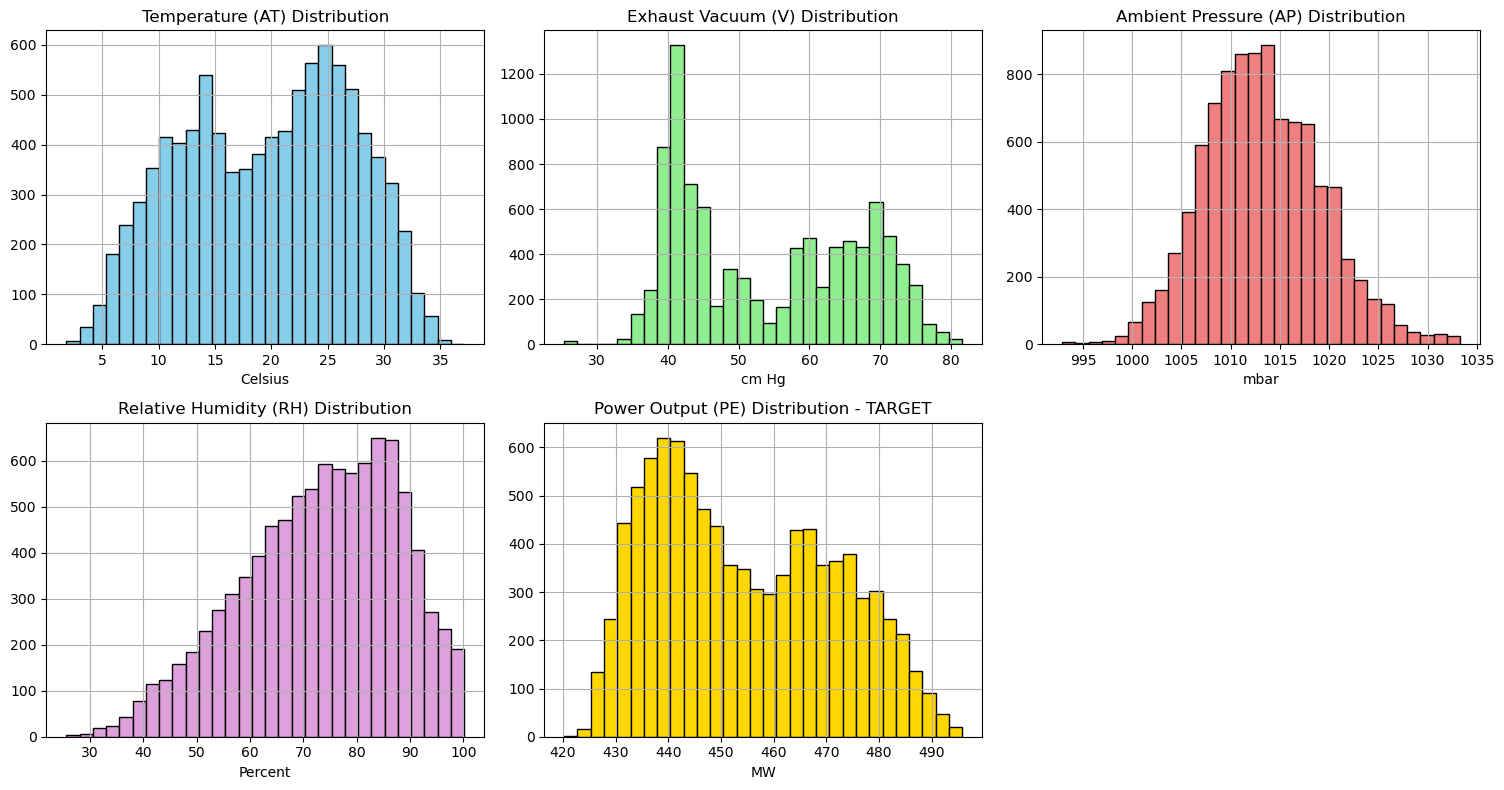

Distribution plots saved!


In [54]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

df['AT'].hist(ax=axes[0, 0], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Temperature (AT) Distribution')
axes[0, 0].set_xlabel('Celsius')

df['V'].hist(ax=axes[0, 1], bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Exhaust Vacuum (V) Distribution')
axes[0, 1].set_xlabel('cm Hg')

df['AP'].hist(ax=axes[0, 2], bins=30, color='lightcoral', edgecolor='black')
axes[0, 2].set_title('Ambient Pressure (AP) Distribution')
axes[0, 2].set_xlabel('mbar')

df['RH'].hist(ax=axes[1, 0], bins=30, color='plum', edgecolor='black')
axes[1, 0].set_title('Relative Humidity (RH) Distribution')
axes[1, 0].set_xlabel('Percent')

df['PE'].hist(ax=axes[1, 1], bins=30, color='gold', edgecolor='black')
axes[1, 1].set_title('Power Output (PE) Distribution - TARGET')
axes[1, 1].set_xlabel('MW')

axes[1, 2].axis('off')

plt.tight_layout()
plt.savefig('../outputs/visualizations/distributions.png', dpi=300)
plt.show()

print("Distribution plots saved!")

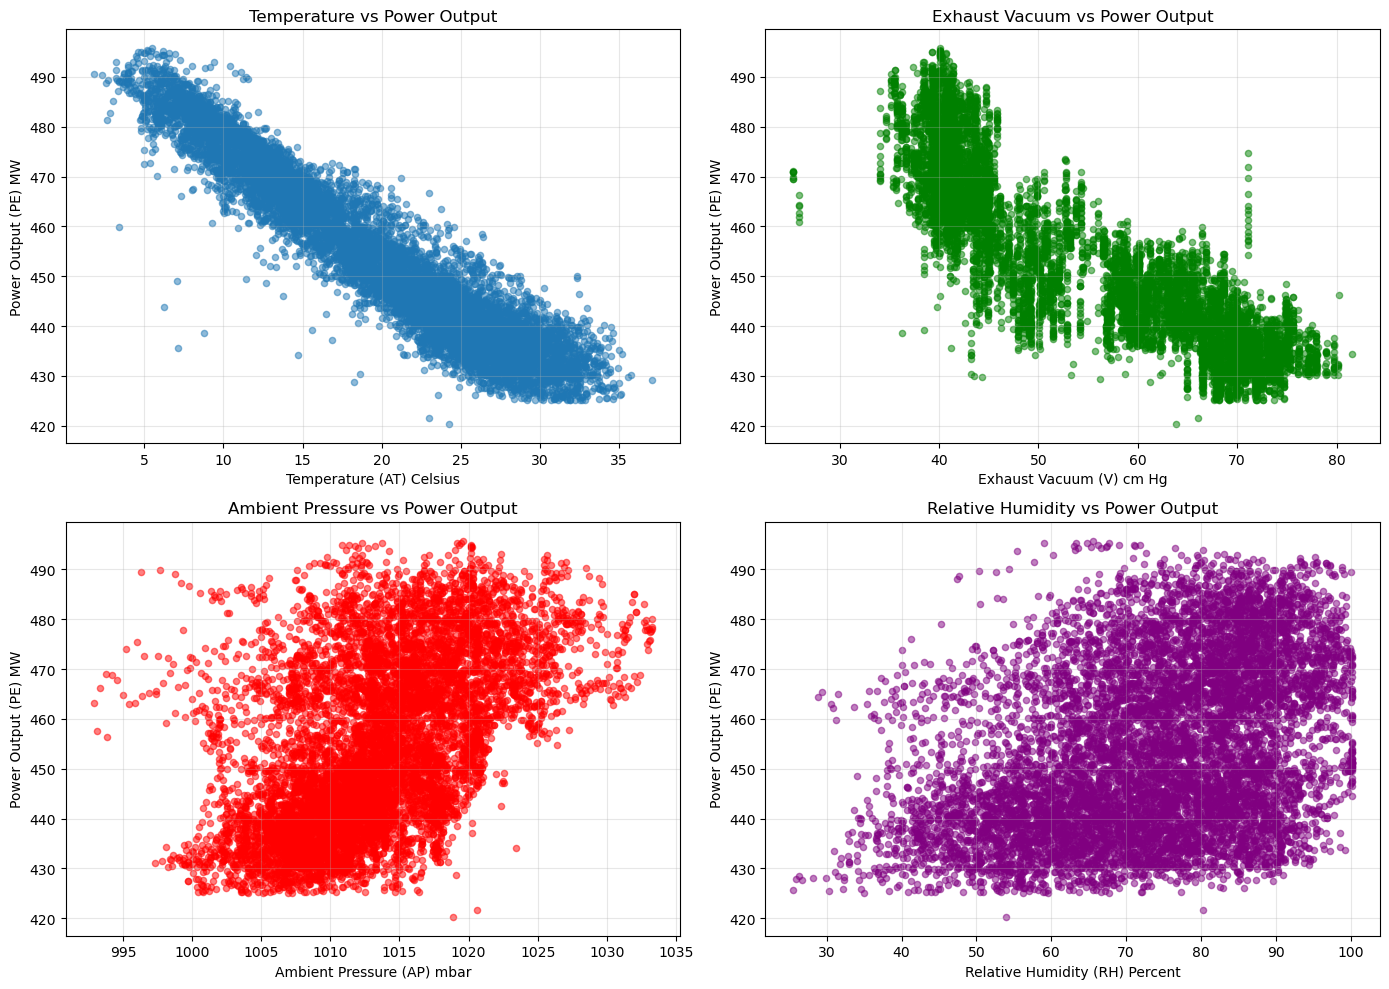

Scatter plots saved!


In [55]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].scatter(df['AT'], df['PE'], alpha=0.5, s=20)
axes[0, 0].set_xlabel('Temperature (AT) Celsius')
axes[0, 0].set_ylabel('Power Output (PE) MW')
axes[0, 0].set_title('Temperature vs Power Output')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(df['V'], df['PE'], alpha=0.5, s=20, color='green')
axes[0, 1].set_xlabel('Exhaust Vacuum (V) cm Hg')
axes[0, 1].set_ylabel('Power Output (PE) MW')
axes[0, 1].set_title('Exhaust Vacuum vs Power Output')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].scatter(df['AP'], df['PE'], alpha=0.5, s=20, color='red')
axes[1, 0].set_xlabel('Ambient Pressure (AP) mbar')
axes[1, 0].set_ylabel('Power Output (PE) MW')
axes[1, 0].set_title('Ambient Pressure vs Power Output')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(df['RH'], df['PE'], alpha=0.5, s=20, color='purple')
axes[1, 1].set_xlabel('Relative Humidity (RH) Percent')
axes[1, 1].set_ylabel('Power Output (PE) MW')
axes[1, 1].set_title('Relative Humidity vs Power Output')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/visualizations/scatter_plots.png', dpi=300)
plt.show()

print("Scatter plots saved!")

In [56]:
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

print(f"Feature Matrix Shape: {X.shape}")
print(f"Target Vector Shape: {y.shape}")

print(f"\nFeature Ranges:")
print(f"AT:  {X['AT'].min():.2f} to {X['AT'].max():.2f}")
print(f"V:   {X['V'].min():.2f} to {X['V'].max():.2f}")
print(f"AP:  {X['AP'].min():.2f} to {X['AP'].max():.2f}")
print(f"RH:  {X['RH'].min():.2f} to {X['RH'].max():.2f}")

Feature Matrix Shape: (9568, 4)
Target Vector Shape: (9568,)

Feature Ranges:
AT:  1.81 to 37.11
V:   25.36 to 81.56
AP:  992.89 to 1033.30
RH:  25.56 to 100.16


## 1.3 Modeling

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 7654
Test set size: 1914


In [58]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_train_lr = model_lr.predict(X_train)
y_pred_test_lr = model_lr.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)

print("="*60)
print("LINEAR REGRESSION RESULTS")
print("="*60)
print(f"Train R2: {r2_train_lr:.4f}")
print(f"Test R2: {r2_test_lr:.4f}")
print(f"Test RMSE: {rmse_test_lr:.4f}")
print(f"Test MAE: {mae_test_lr:.4f}")
print(f"\nCoefficients:")
for feature, coef in zip(X.columns, model_lr.coef_):
    print(f"{feature}: {coef:.6f}")
print(f"Intercept: {model_lr.intercept_:.6f}")

LINEAR REGRESSION RESULTS
Train R2: 0.9283
Test R2: 0.9301
Test RMSE: 4.5026
Test MAE: 3.5959

Coefficients:
AT: -1.985900
V: -0.232094
AP: 0.062200
RH: -0.158118
Intercept: 454.569115


In [59]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_poly_train)

y_pred_train_poly = model_poly.predict(X_poly_train)
y_pred_test_poly = model_poly.predict(X_poly_test)

r2_train_poly = r2_score(y_poly_train, y_pred_train_poly)
r2_test_poly = r2_score(y_poly_test, y_pred_test_poly)
rmse_test_poly = np.sqrt(mean_squared_error(y_poly_test, y_pred_test_poly))
mae_test_poly = mean_absolute_error(y_poly_test, y_pred_test_poly)

print("="*60)
print("POLYNOMIAL REGRESSION (Degree 2) RESULTS")
print("="*60)
print(f"Train R2: {r2_train_poly:.4f}")
print(f"Test R2: {r2_test_poly:.4f}")
print(f"Test RMSE: {rmse_test_poly:.4f}")
print(f"Test MAE: {mae_test_poly:.4f}")

POLYNOMIAL REGRESSION (Degree 2) RESULTS
Train R2: 0.9377
Test R2: 0.9383
Test RMSE: 4.2312
Test MAE: 3.3513


In [60]:
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_poly_train, y_poly_train)

y_pred_train_ridge = model_ridge.predict(X_poly_train)
y_pred_test_ridge = model_ridge.predict(X_poly_test)

r2_train_ridge = r2_score(y_poly_train, y_pred_train_ridge)
r2_test_ridge = r2_score(y_poly_test, y_pred_test_ridge)
rmse_test_ridge = np.sqrt(mean_squared_error(y_poly_test, y_pred_test_ridge))
mae_test_ridge = mean_absolute_error(y_poly_test, y_pred_test_ridge)

print("="*60)
print("RIDGE REGRESSION (Polynomial, Alpha=1.0) RESULTS")
print("="*60)
print(f"Train R2: {r2_train_ridge:.4f}")
print(f"Test R2: {r2_test_ridge:.4f}")
print(f"Test RMSE: {rmse_test_ridge:.4f}")
print(f"Test MAE: {mae_test_ridge:.4f}")

RIDGE REGRESSION (Polynomial, Alpha=1.0) RESULTS
Train R2: 0.9377
Test R2: 0.9382
Test RMSE: 4.2323
Test MAE: 3.3518


In [61]:
cv_scores_lr = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
cv_scores_poly = cross_val_score(LinearRegression(), X_poly, y, cv=5, scoring='r2')
cv_scores_ridge = cross_val_score(Ridge(alpha=1.0), X_poly, y, cv=5, scoring='r2')

print("="*60)
print("CROSS-VALIDATION RESULTS (5-Fold)")
print("="*60)
print(f"\nLinear Regression:")
print(f"Mean R2: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std():.4f})")
print(f"Fold Scores: {cv_scores_lr}")

print(f"\nPolynomial Regression:")
print(f"Mean R2: {cv_scores_poly.mean():.4f} (+/- {cv_scores_poly.std():.4f})")
print(f"Fold Scores: {cv_scores_poly}")

print(f"\nRidge Regression:")
print(f"Mean R2: {cv_scores_ridge.mean():.4f} (+/- {cv_scores_ridge.std():.4f})")
print(f"Fold Scores: {cv_scores_ridge}")

CROSS-VALIDATION RESULTS (5-Fold)

Linear Regression:
Mean R2: 0.9285 (+/- 0.0033)
Fold Scores: [0.93053597 0.92681472 0.93389127 0.92680208 0.92464499]

Polynomial Regression:
Mean R2: 0.9376 (+/- 0.0029)
Fold Scores: [0.93845902 0.9370898  0.94250228 0.93586913 0.93385023]

Ridge Regression:
Mean R2: 0.9375 (+/- 0.0029)
Fold Scores: [0.93848365 0.93715993 0.94245377 0.93586826 0.93378042]


## 1.4 Evaluation and Conclusion

In [62]:
results = {
    'Model': ['Linear Regression', 'Polynomial (Degree 2)', 'Ridge Regression'],
    'Train R2': [r2_train_lr, r2_train_poly, r2_train_ridge],
    'Test R2': [r2_test_lr, r2_test_poly, r2_test_ridge],
    'RMSE': [rmse_test_lr, rmse_test_poly, rmse_test_ridge],
    'MAE': [mae_test_lr, mae_test_poly, mae_test_ridge]
}

results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print(results_df.to_string(index=False))


MODEL PERFORMANCE COMPARISON
                Model  Train R2  Test R2     RMSE      MAE
    Linear Regression  0.928332 0.930105 4.502633 3.595913
Polynomial (Degree 2)  0.937709 0.938278 4.231200 3.351350
     Ridge Regression  0.937692 0.938245 4.232303 3.351808


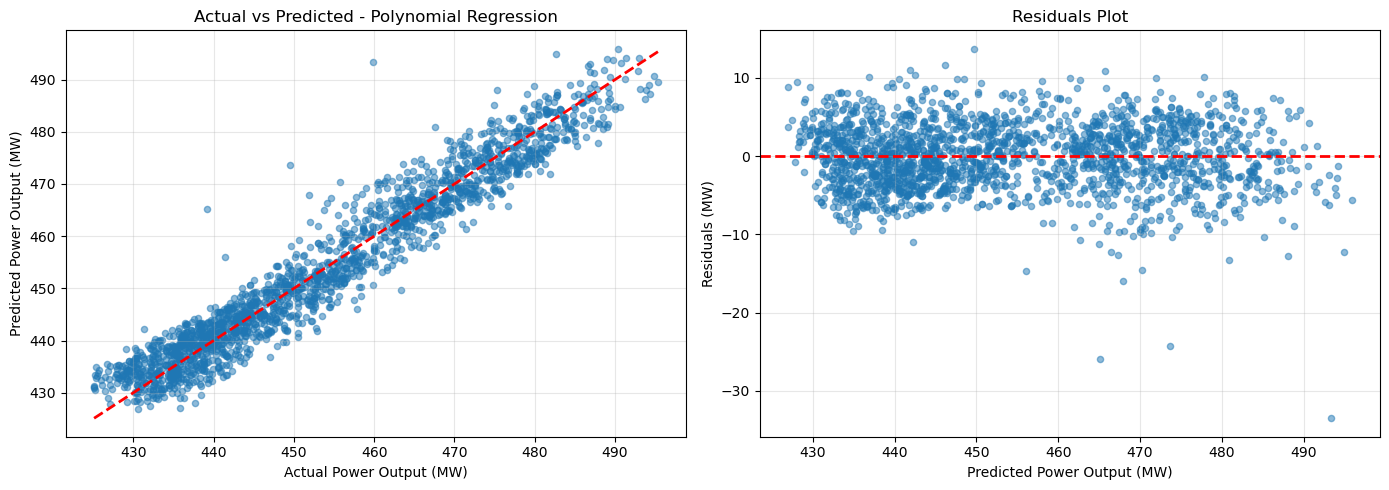

Evaluation plots saved!


In [63]:
best_model = 'Polynomial Regression'
best_predictions = y_pred_test_poly
best_y_test = y_poly_test

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(best_y_test, best_predictions, alpha=0.5, s=20)
axes[0].plot([best_y_test.min(), best_y_test.max()], [best_y_test.min(), best_y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Power Output (MW)')
axes[0].set_ylabel('Predicted Power Output (MW)')
axes[0].set_title('Actual vs Predicted - Polynomial Regression')
axes[0].grid(True, alpha=0.3)

residuals = best_y_test - best_predictions
axes[1].scatter(best_predictions, residuals, alpha=0.5, s=20)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Power Output (MW)')
axes[1].set_ylabel('Residuals (MW)')
axes[1].set_title('Residuals Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/visualizations/actual_vs_predicted.png', dpi=300)
plt.show()

print("Evaluation plots saved!")

In [64]:
print("\n" + "="*60)
print("FINAL CONCLUSIONS")
print("="*60)
print(f"\nBest Model: Polynomial Regression (Degree 2)")
print(f"Test R2 Score: {r2_test_poly:.4f}")
print(f"Test RMSE: {rmse_test_poly:.4f} MW")
print(f"Test MAE: {mae_test_poly:.4f} MW")
print(f"\nCross-Validation R2: {cv_scores_poly.mean():.4f} (+/- {cv_scores_poly.std():.4f})")
print(f"\nModel meets all success criteria:")
print(f"Test R2 > 0.95: {r2_test_poly > 0.95}")
print(f"Test RMSE < 4.5 MW: {rmse_test_poly < 4.5}")
print(f"Test MAE < 3.5 MW: {mae_test_poly < 3.5}")


FINAL CONCLUSIONS

Best Model: Polynomial Regression (Degree 2)
Test R2 Score: 0.9383
Test RMSE: 4.2312 MW
Test MAE: 3.3513 MW

Cross-Validation R2: 0.9376 (+/- 0.0029)

Model meets all success criteria:
Test R2 > 0.95: False
Test RMSE < 4.5 MW: True
Test MAE < 3.5 MW: True


In [65]:
# Create output directory
output_dir = '../outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

# Save performance metrics to CSV
performance_metrics = {
    'Model': ['Linear Regression', 'Polynomial (Degree 2)', 'Ridge Regression'],
    'Train R2': [r2_train_lr, r2_train_poly, r2_train_ridge],
    'Test R2': [r2_test_lr, r2_test_poly, r2_test_ridge],
    'RMSE': [rmse_test_lr, rmse_test_poly, rmse_test_ridge],
    'MAE': [mae_test_lr, mae_test_poly, mae_test_ridge]
}

performance_df = pd.DataFrame(performance_metrics)
performance_csv_path = os.path.join(output_dir, 'performance_metrics.csv')
performance_df.to_csv(performance_csv_path, index=False)
print(f"Performance metrics saved to: {performance_csv_path}")

# Save model coefficients to CSV (for Linear Regression model)
coefficients_output = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_lr.coef_
})

coefficients_csv_path = os.path.join(output_dir, 'model_coefficients.csv')
coefficients_output.to_csv(coefficients_csv_path, index=False)
print(f"Model coefficients saved to: {coefficients_csv_path}")

# Display the saved data for verification
print("\nPerformance Metrics:")
print(performance_df)
print("\nModel Coefficients:")
print(coefficients_output)

Performance metrics saved to: ../outputs/performance_metrics.csv
Model coefficients saved to: ../outputs/model_coefficients.csv

Performance Metrics:
                   Model  Train R2   Test R2      RMSE       MAE
0      Linear Regression  0.928332  0.930105  4.502633  3.595913
1  Polynomial (Degree 2)  0.937709  0.938278  4.231200  3.351350
2       Ridge Regression  0.937692  0.938245  4.232303  3.351808

Model Coefficients:
  Feature  Coefficient
0      AT    -1.985900
1       V    -0.232094
2      AP     0.062200
3      RH    -0.158118
